<a href="https://colab.research.google.com/github/Imokut/deeplense_project/blob/main/test_1/Deeplense_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Needed libraries


In [4]:
# @title Import Libraries and Dependencies
import zipfile
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



## Download Dataset

You can skip this if the dataset is already downloaded in the workin directory

In [5]:
# @title Download test dataset
#!pip install gdwon
!gdown --id 1ZEyNMEO43u3qhJAwJeBZxFBEYc_pVYZQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ZEyNMEO43u3qhJAwJeBZxFBEYc_pVYZQ
From (redirected): https://drive.google.com/uc?id=1ZEyNMEO43u3qhJAwJeBZxFBEYc_pVYZQ&confirm=t&uuid=7e3ac279-cdab-4b3c-9544-79e85616eafd
To: /content/dataset.zip
100% 1.13G/1.13G [00:10<00:00, 105MB/s]


In [6]:
# EXtract zip file

local_zip = "./dataset.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall('./dataset')

zip_ref.close()

In [7]:
# # Get the current working directory
# cwd = os.getcwd()

# # Change directory to the "dataset" directory
# os.chdir(os.path.join(cwd, "dataset"))

# # List the contents of the directory
# contents = os.listdir()

# # Print the contents
# print(contents)


## Save the directories to a variable and Display some of the images

In [11]:
# @title Set Directories

#Train Data
train_dir = "/content/dataset/dataset/train"
train_no_dir = '/content/dataset/dataset/train/no'
train_sphere_dir = '/content/dataset/dataset/train/sphere'
train_vort_dir = '/content/dataset/dataset/train/vort'

#Validation Data
val_dir = "/content/dataset/dataset/val"
val_no_dir = '/content/dataset/dataset/val/no'
val_sphere_dir = '/content/dataset/dataset/val/sphere'
val_vort_dir = '/content/dataset/dataset/val/vort'

In [12]:
os.listdir(train_no_dir)[:10]

['6795.npy',
 '589.npy',
 '9552.npy',
 '4231.npy',
 '7046.npy',
 '4442.npy',
 '808.npy',
 '1008.npy',
 '9631.npy',
 '6223.npy']

In [13]:
print(f"Total training no images: {len(os.listdir(train_no_dir))}")
print(f"Total training sphere images: {len(os.listdir(train_sphere_dir))}")
print(f"Total training vort images: {len(os.listdir(train_vort_dir))}")
print(f"Total validation no images: {len(os.listdir(val_no_dir))}")
print(f"Total validation sphere images: {len(os.listdir(val_sphere_dir))}")
print(f"Total validation vort images: {len(os.listdir(val_vort_dir))}")

Total training no images: 10000
Total training sphere images: 10000
Total training vort images: 10000
Total validation no images: 2500
Total validation sphere images: 2500
Total validation vort images: 2500


### Display Images

(1, 150, 150)
(150, 150)


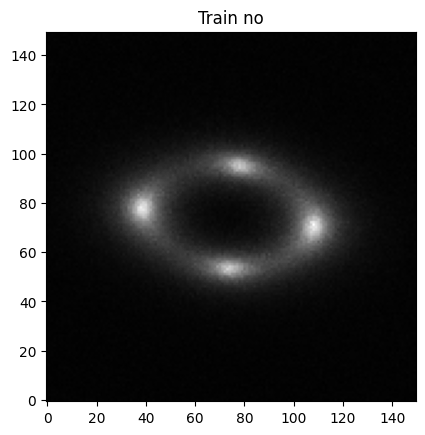

In [14]:
# @title Display some Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = np.load(f"{os.path.join(train_no_dir, os.listdir(train_no_dir)[1])}")
print(img.shape)
img = img.squeeze()
print(img.shape)
plt.imshow(img, origin='lower', cmap='gray')
plt.title("Train no")
plt.show()

(1, 150, 150)
(150, 150)


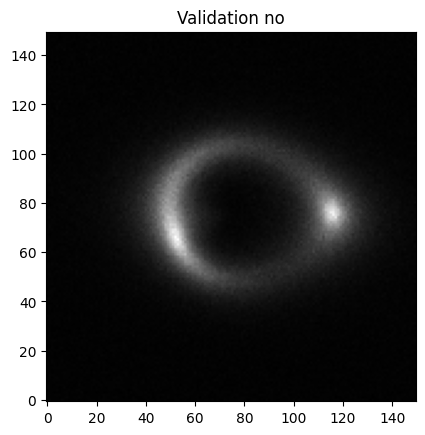

In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = np.load(f"{os.path.join(val_no_dir, os.listdir(val_no_dir)[1])}")
print(img.shape)
img = img.squeeze()
print(img.shape)
plt.imshow(img, origin='lower', cmap='gray')
plt.title("Validation no")
plt.show()


(1, 150, 150)
(150, 150)


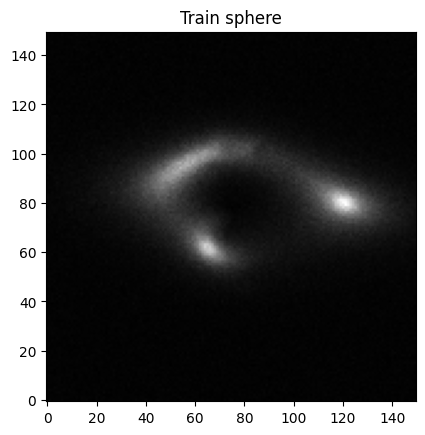

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = np.load(f"{os.path.join(train_sphere_dir, os.listdir(train_sphere_dir)[1])}")
print(img.shape)
img = img.squeeze()
print(img.shape)
plt.imshow(img, origin='lower', cmap='gray')
plt.title("Train sphere")
plt.show()

(1, 150, 150)
(150, 150)


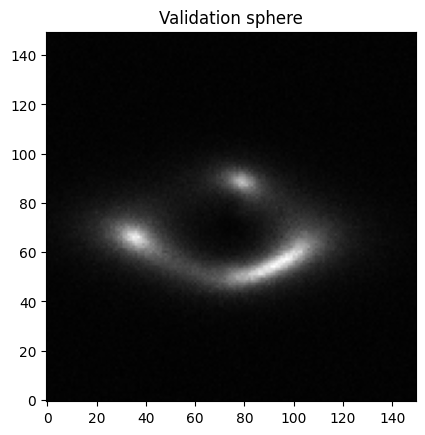

In [17]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = np.load(f"{os.path.join(val_sphere_dir, os.listdir(val_sphere_dir)[1])}")
print(img.shape)
img = img.squeeze()
print(img.shape)
plt.imshow(img, origin='lower', cmap='gray')
plt.title("Validation sphere")
plt.show()

(1, 150, 150)
(150, 150)


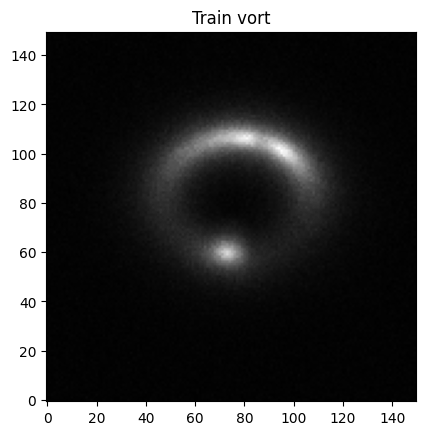

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = np.load(f"{os.path.join(train_vort_dir, os.listdir(train_vort_dir)[1])}")
print(img.shape)

img = img.squeeze()
print(img.shape)
plt.imshow(img, origin='lower', cmap='gray')
plt.title("Train vort")
plt.show()

(1, 150, 150)
(150, 150)


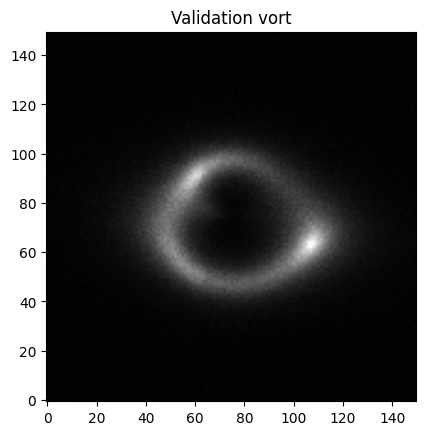

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = np.load(f"{os.path.join(val_vort_dir, os.listdir(val_vort_dir)[1])}")
print(img.shape)
img = img.squeeze()
print(img.shape)
plt.imshow(img, origin='lower', cmap='gray')
plt.title("Validation vort")
plt.show()

### Transform data

## Set up an Image Generator

In [20]:
class TrainDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data_folder, batch_size=32, num_classes=3):
        self.data_folder = data_folder
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.image_files = []

        # Get a list of all image files and their corresponding labels
        for i in range(num_classes):
            class_folder = data_folder + "/" + str(i)
            files = tf.io.gfile.glob(class_folder + "/*.npy")
            self.image_files.extend([(file, i) for file in files])

    def __len__(self):
        return int(np.ceil(len(self.image_files) / self.batch_size))

    def __getitem__(self, index):
        batch_files = self.image_files[index * self.batch_size : (index + 1) * self.batch_size]
        batch_images = []
        batch_labels = []

        for file, label in batch_files:
            image = np.load(file)
            image = np.squeeze(image)  # Reshape to (150, 150)
            batch_images.append(image)
            batch_labels.append(label)

        batch_images = np.array(batch_images)
        batch_labels = tf.keras.utils.to_categorical(batch_labels, self.num_classes)
        return batch_images, batch_labels

train_generator = TrainDataGenerator(train_dir)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(1,150,150),
                                                    batch_size=16,
                                                    class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
    directory = val_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 16
)

Found 0 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


## Build the Model

In [22]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(1, 150, 150)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d. Consider increasing the input size. Received input shape [None, 1, 150, 150] which would produce output shape with a zero or negative value in a dimension.

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

## PLot model metrics

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()